Тема 7. №1.Сгенерировать выборку указанного вида при некотором θ, построить по ней график функции
g(θ) = n^(−1)ln L(θ) (в пункте б) – обычного) для следующих моделей при n = 1, 5, 20, 100. Отметить
на графике настоящее значение параметра и ОМП. Что такое информация Фишера с точки зрения
предельного поведения g(θ)?
(a) 1 вариант – X1, . . . , Xn ∼ N (0, θ), 2 вариант X1, . . . , Xn ∼ N (θ, 1).
(b) X1, . . . , Xn ∼ R[0, θ].

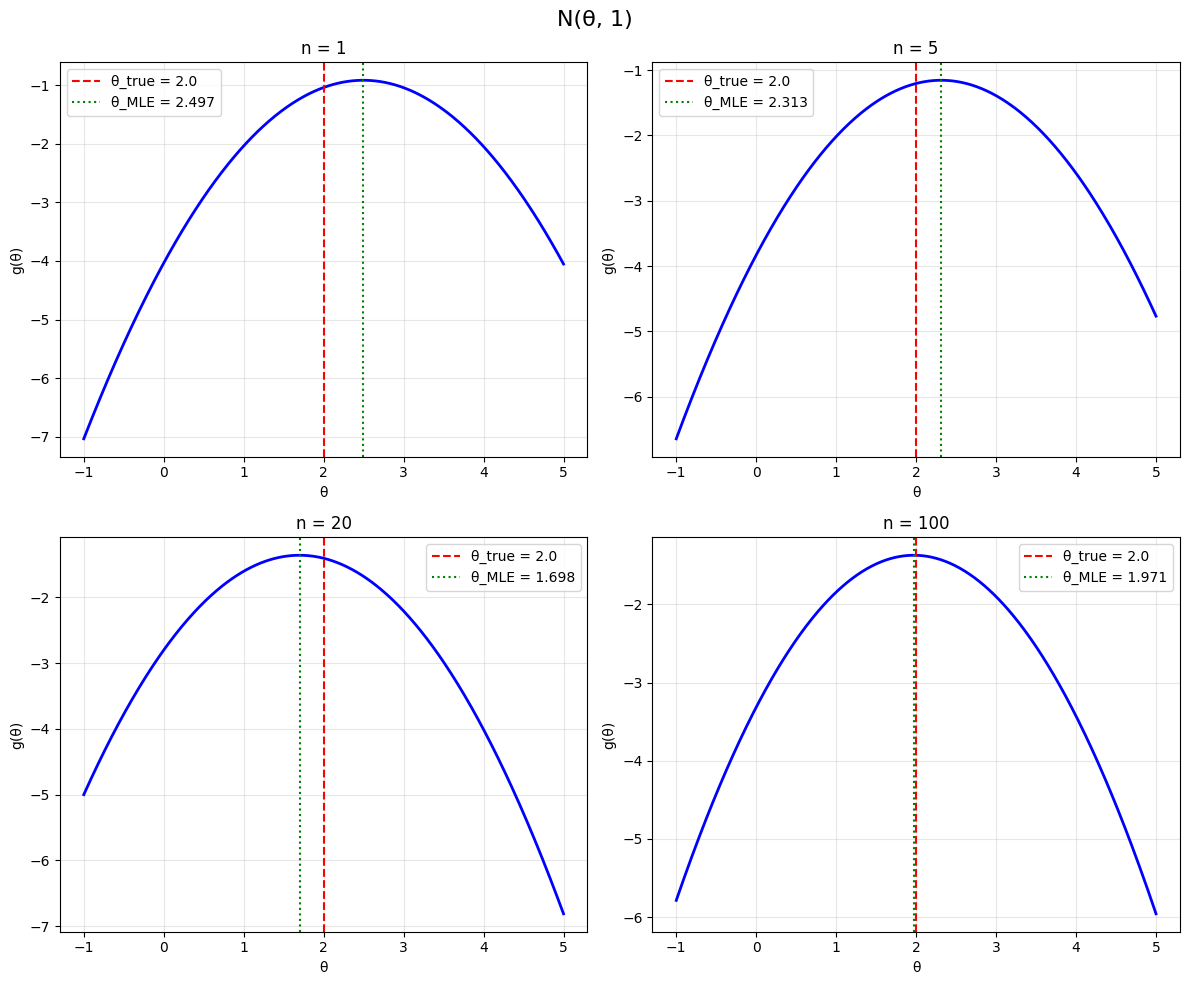

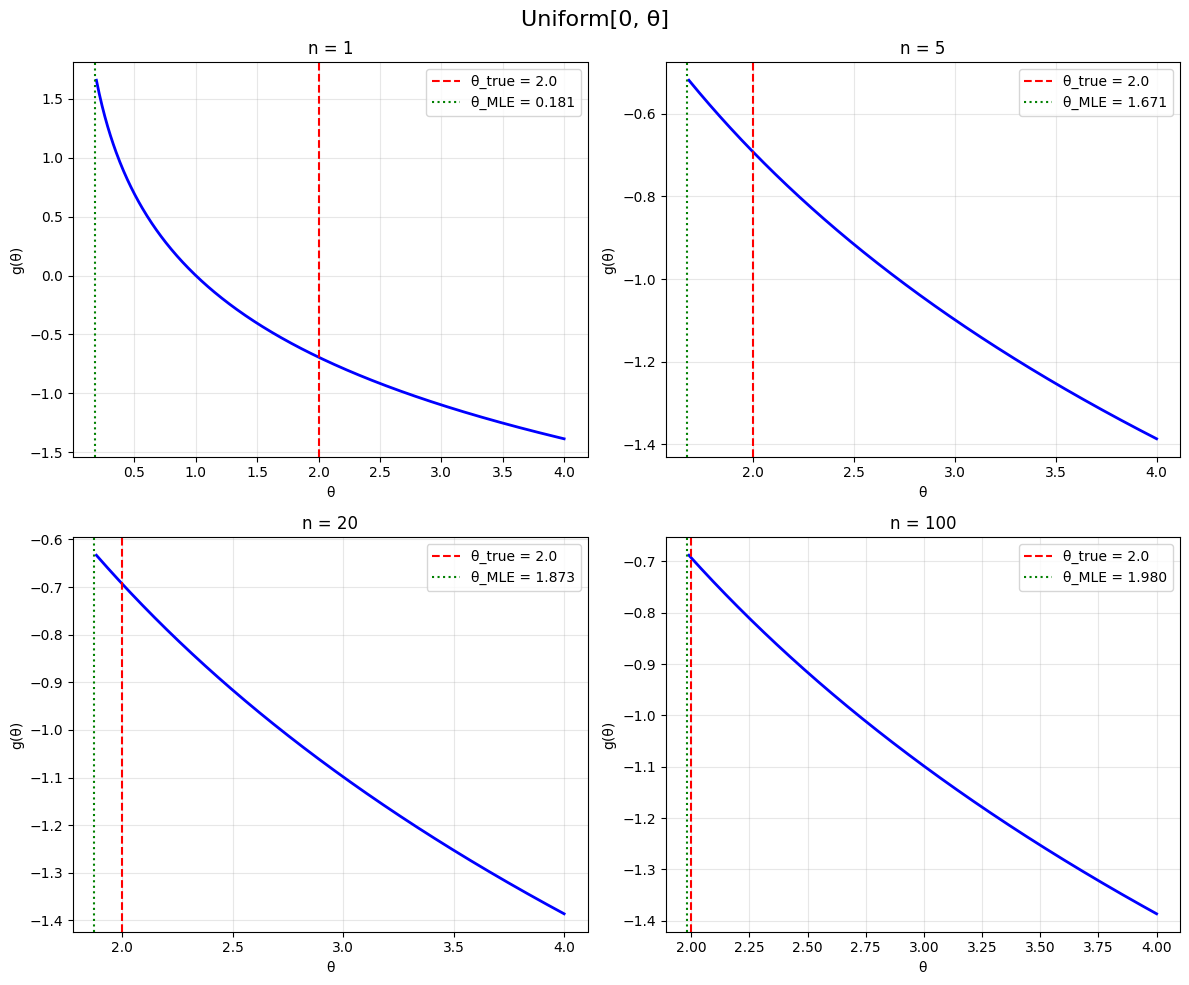

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

theta_true = 2.0  # Истинное значение параметра
sample_sizes = [1, 5, 20, 100]
np.random.seed(42)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('N(θ, 1)', fontsize=16)
axes = axes.flatten()

for idx, n in enumerate(sample_sizes):
    sample = np.random.normal(theta_true, 1, n)
    theta_grid = np.linspace(theta_true - 3, theta_true + 3, 500)
    log_likelihood = np.zeros_like(theta_grid)
    
    for i, theta in enumerate(theta_grid):
        log_likelihood[i] = np.sum(norm.logpdf(sample, theta, 1))
    g_theta = log_likelihood / n
    theta_mle = np.mean(sample)
    
    axes[idx].plot(theta_grid, g_theta, 'b-', linewidth=2)
    axes[idx].axvline(theta_true, color='r', linestyle='--', label=f'θ_true = {theta_true}')
    axes[idx].axvline(theta_mle, color='g', linestyle=':', label=f'θ_MLE = {theta_mle:.3f}')
    axes[idx].set_xlabel('θ')
    axes[idx].set_ylabel('g(θ)')
    axes[idx].set_title(f'n = {n}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#  Uniform[0, θ]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Uniform[0, θ]', fontsize=16)
axes = axes.flatten()

for idx, n in enumerate(sample_sizes):
    sample = np.random.uniform(0, theta_true, n)
    theta_grid = np.linspace(np.max(sample) + 0.01, theta_true + 2, 500)
    log_likelihood = np.zeros_like(theta_grid)
    
    for i, theta in enumerate(theta_grid):
        if theta >= np.max(sample):
            log_likelihood[i] = -n * np.log(theta)
        else:
            log_likelihood[i] = -np.inf
    
    g_theta = log_likelihood / n
    theta_mle = np.max(sample)
    
    axes[idx].plot(theta_grid, g_theta, 'b-', linewidth=2)
    axes[idx].axvline(theta_true, color='r', linestyle='--', label=f'θ_true = {theta_true}')
    axes[idx].axvline(theta_mle, color='g', linestyle=':', label=f'θ_MLE = {theta_mle:.3f}')
    axes[idx].set_xlabel('θ')
    axes[idx].set_ylabel('g(θ)')
    axes[idx].set_title(f'n = {n}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Тема 8. №2. X1, ..., Xn ∼ R[0, θ].

(a) Построить асимптотический доверительный интервал, используя X. Найти эмпирически до-
верительную вероятность этого интервала (построить 1000 выборок, подсчитать долю тех,

для которых интервал накрыл истинное значение параметра, для n = 20, 50, 100.
(b) Построить точный доверительный интервал, используя достаточную статистику. Сравнить
средние длины точного и асимптотического интервалов при n = 20, 50, 100.

In [ ]:
theta_true = 1.0
alpha = 0.05
n_list = [20, 50, 100]
num_samples = 1000
z = norm.ppf(1 - alpha/2)  

for n in n_list:
    cover_asymp = 0
    cover_exact = 0
    len_asymp = 0
    len_exact = 0
    
    for _ in range(num_samples):
        sample = np.random.uniform(0, theta_true, n)
        
        x_bar = np.mean(sample) #ac
        theta_hat = 2 * x_bar
        se = theta_hat / np.sqrt(3 * n)
        lower_asymp = theta_hat - z * se
        upper_asymp = theta_hat + z * se
        
        if lower_asymp <= theta_true <= upper_asymp:
            cover_asymp += 1
        len_asymp += (upper_asymp - lower_asymp)
        
        T = np.max(sample) #точ
        lower_exact = T / (1 - alpha/2)**(1/n)
        upper_exact = T / (alpha/2)**(1/n)
        
        if lower_exact <= theta_true <= upper_exact:
            cover_exact += 1
        len_exact += (upper_exact - lower_exact)
    
    print(f"n = {n}:")
    print(f"  Асимптотический интервал: покрытие = {cover_asymp/num_samples:.3f}, средняя длина = {len_asymp/num_samples:.3f}")
    print(f"  Точный интервал: покрытие = {cover_exact/num_samples:.3f}, средняя длина = {len_exact/num_samples:.3f}")
    print()

n = 20:
  Асимптотический интервал: покрытие = 0.933, средняя длина = 0.505
  Точный интервал: покрытие = 0.954, средняя длина = 0.192

n = 50:
  Асимптотический интервал: покрытие = 0.955, средняя длина = 0.320
  Точный интервал: покрытие = 0.944, средняя длина = 0.075

n = 100:
  Асимптотический интервал: покрытие = 0.951, средняя длина = 0.227
  Точный интервал: покрытие = 0.954, средняя длина = 0.037



Тема 9. №1. Пусть Xi ∼ Bern(θ), для H0 : θ = 1/2 и H1 : θ = θ1, где а) θ1 = 1/3, б) θ1 = 2/3. Рассмотрим кри-
терий {Pn i=1 Xi > C}, n = 10. Построить графики вероятностей ошибки I рода, ошибки II рода и
мощности критерия в зависимости от C. Для какой из двух альтернатив осмысленно использовать
этот критерий?

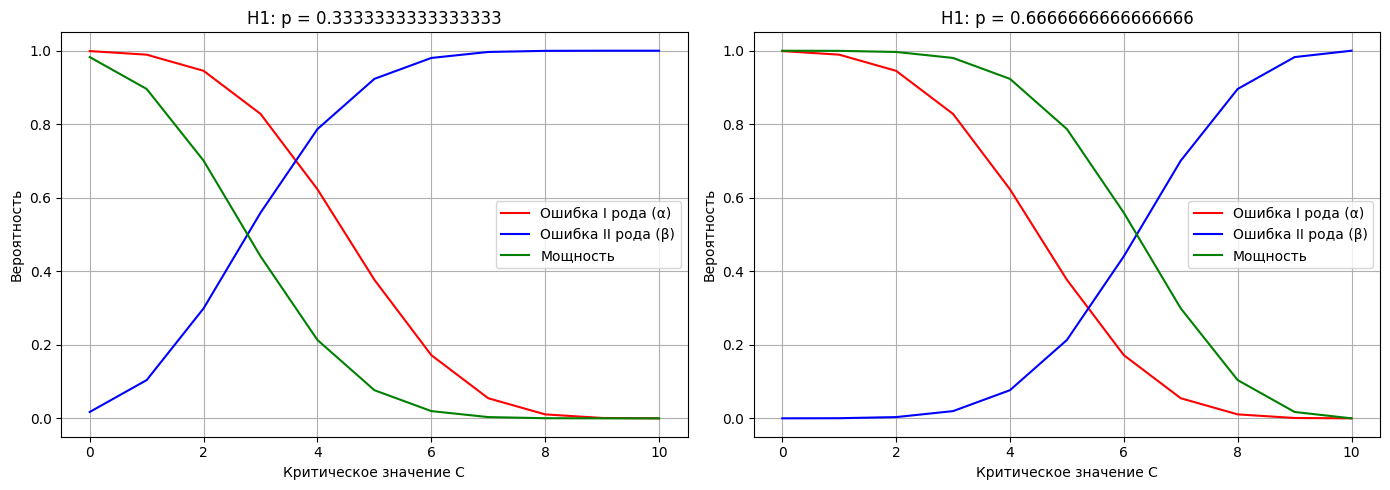

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n = 10
p0 = 0.5  # H0
p1_list = [1/3, 2/3]  # H1

C_values = np.arange(0, n+1)

plt.figure(figsize=(14, 5))

for i, p1 in enumerate(p1_list):
    alpha = 1 - binom.cdf(C_values, n, p0)  # P(∑X > C | H0) - ошибка I рода
    beta = binom.cdf(C_values, n, p1)       # P(∑X ≤ C | H1) - ошибка II рода
    power = 1 - beta                         # Мощность = 1 - ошибка II рода
    
    plt.subplot(1, 2, i+1)
    plt.plot(C_values, alpha, 'r-', label='Ошибка I рода (α)')
    plt.plot(C_values, beta, 'b-', label='Ошибка II рода (β)')
    plt.plot(C_values, power, 'g-', label='Мощность')
    plt.xlabel('Критическое значение C')
    plt.ylabel('Вероятность')
    plt.title(f'H1: p = {p1}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Тема 10. №1. X1, ..., Xn ∼ Bern(θ), θ ∼ R[0, 1]. Посчитать апостериорную плотность и построить ее график.
а) для выборок размера n = 5, 10, 20, 50, 100 для θ = 1/2, θ = 1/3;
б) вместо генерации выборки положите Pn i=1 Xi равной 9n/10 или 99n/100.

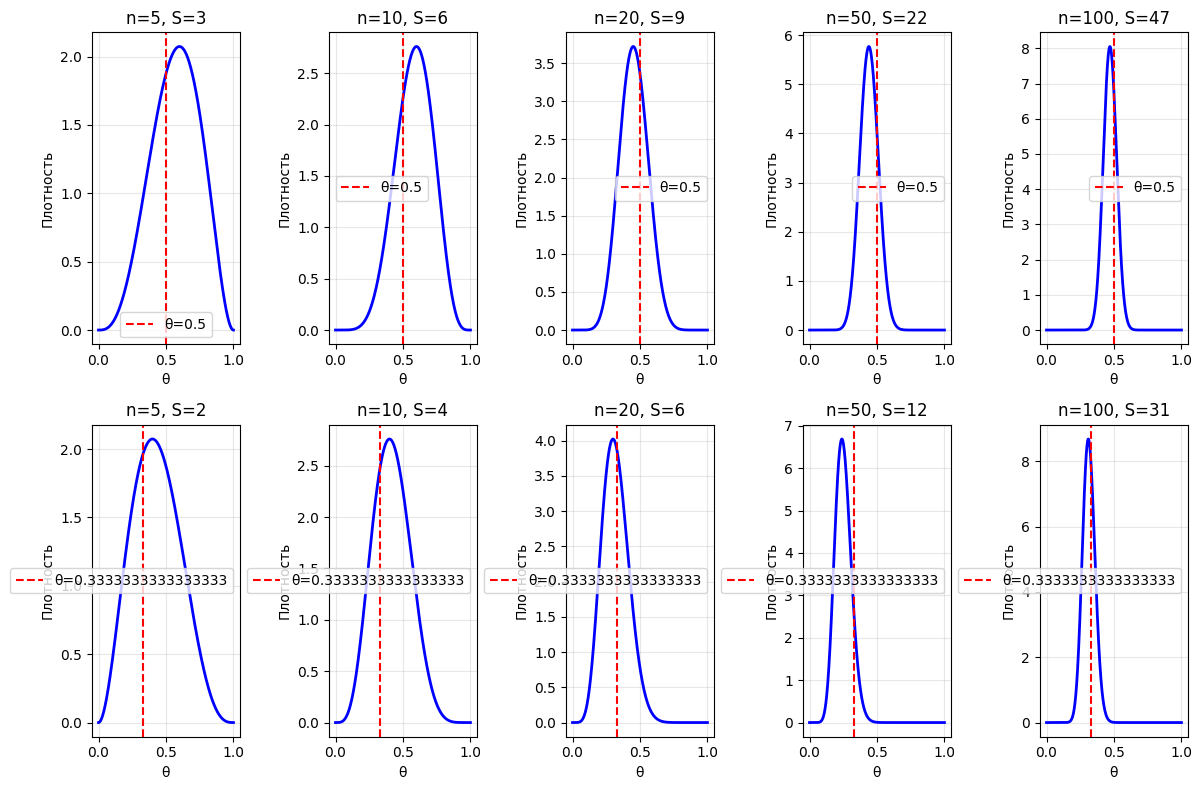

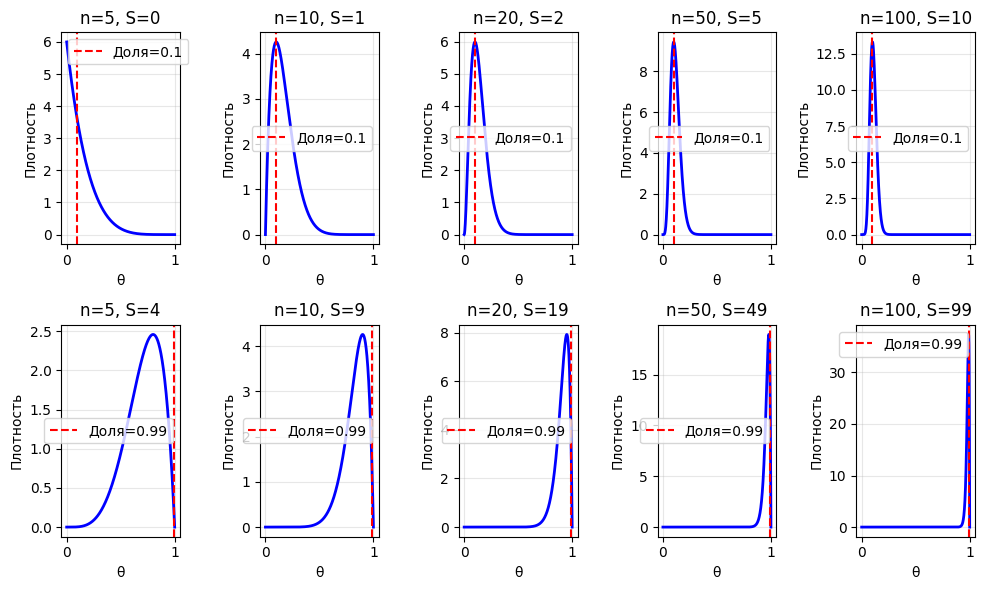

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

theta_true_list = [1/2, 1/3]
n_list = [5, 10, 20, 50, 100]

plt.figure(figsize=(12, 8))

for i, theta_true in enumerate(theta_true_list):
    for j, n in enumerate(n_list):
        plt.subplot(2, 5, i*5 + j + 1)
        np.random.seed(42)
        sample = np.random.binomial(1, theta_true, n)
        successes = np.sum(sample)
        
        a = 1 + successes
        b = 1 + n - successes
        
        x = np.linspace(0, 1, 1000)
        y = beta.pdf(x, a, b)
        plt.plot(x, y, 'b-', linewidth=2)
        
        plt.axvline(theta_true, color='r', linestyle='--', linewidth=1.5, label=f'θ={theta_true}')
        plt.title(f'n={n}, S={successes}')
        plt.xlabel('θ')
        plt.ylabel('Плотность')
        plt.legend()
        plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

for k, fraction in enumerate([0.1, 0.99]):  # n/10 и 99n/100
    for j, n in enumerate(n_list):
        plt.subplot(2, 5, k*5 + j + 1)
        
        successes = int(fraction * n)
        
        a = 1 + successes #апостериорная плотность
        b = 1 + n - successes
        
        x = np.linspace(0, 1, 1000)
        y = beta.pdf(x, a, b)
        plt.plot(x, y, 'b-', linewidth=2)
        
        plt.axvline(fraction, color='r', linestyle='--', linewidth=1.5, label=f'Доля={fraction}')
        plt.title(f'n={n}, S={successes}')
        plt.xlabel('θ')
        plt.ylabel('Плотность')
        plt.legend()
        plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Тема 11. №1. Начнем с проверки простой гипотезы.
Найдите первые 1000 цифр числа π после запятой. С помощью критерия хи-квадрат проверьте,
можно ли при уровне значимости 0.05 считать эти цифры случайными равномерными?

In [8]:
import numpy as np
from scipy.stats import chi2

pi_digits = (
    "1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679"
    "8214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196"
    "4428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273"
    "7245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094"
    "3305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912"
    "9833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405132"
    "0005681271452635608277857713427577896091736371787214684409012249534301465495853710507922796892589235"
    "4201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859"
    "5024459455346908302642522308253344685035261931188171010003137838752886587533208381420617177669147303"
    "5982534904287554687311595628638823537875937519577818577805321712268066130019278766111959092164201989"
)

digits = np.array([int(d) for d in pi_digits])

n = len(digits)
k = 10
observed = np.bincount(digits, minlength=k)

expected = np.full(k, n / k) #при равномерном

chi2_stat = np.sum((observed - expected)**2 / expected)

df = k - 1
critical_value = chi2.ppf(0.95, df)

p_value = 1 - chi2.cdf(chi2_stat, df)

print(f"Наблюдаемые частоты: {observed}")
print(f"Ожидаемые частоты: {expected}")
print(f"Статистика хи-квадрат: {chi2_stat:.4f}")
print(f"Критическое значение (α=0.05): {critical_value:.4f}")
print(f"p-value: {p_value:.4f}")


Наблюдаемые частоты: [ 93 116 103 102  93  97  94  95 101 106]
Ожидаемые частоты: [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
Статистика хи-квадрат: 4.7400
Критическое значение (α=0.05): 16.9190
p-value: 0.8564


Тема 12. №1. Пусть Xi ∼ N (0, 1).
1) Построить эмпирическую функцию распределения (ЭФР) на одном графике с теоретической
функцией распределения при разных n (проиллюстрировать сходимость ЭФР к ф.р.). То же для
Xi ∼ R[0, 1], Xi ∼ Bin(m, p), где m = 3, m = 10.

2) Построить 95% доверительную полосу для ф.р., используя а) критерий Колмогорова. б) нера-
венство Дворецкого-Кифера-Вольфовица.

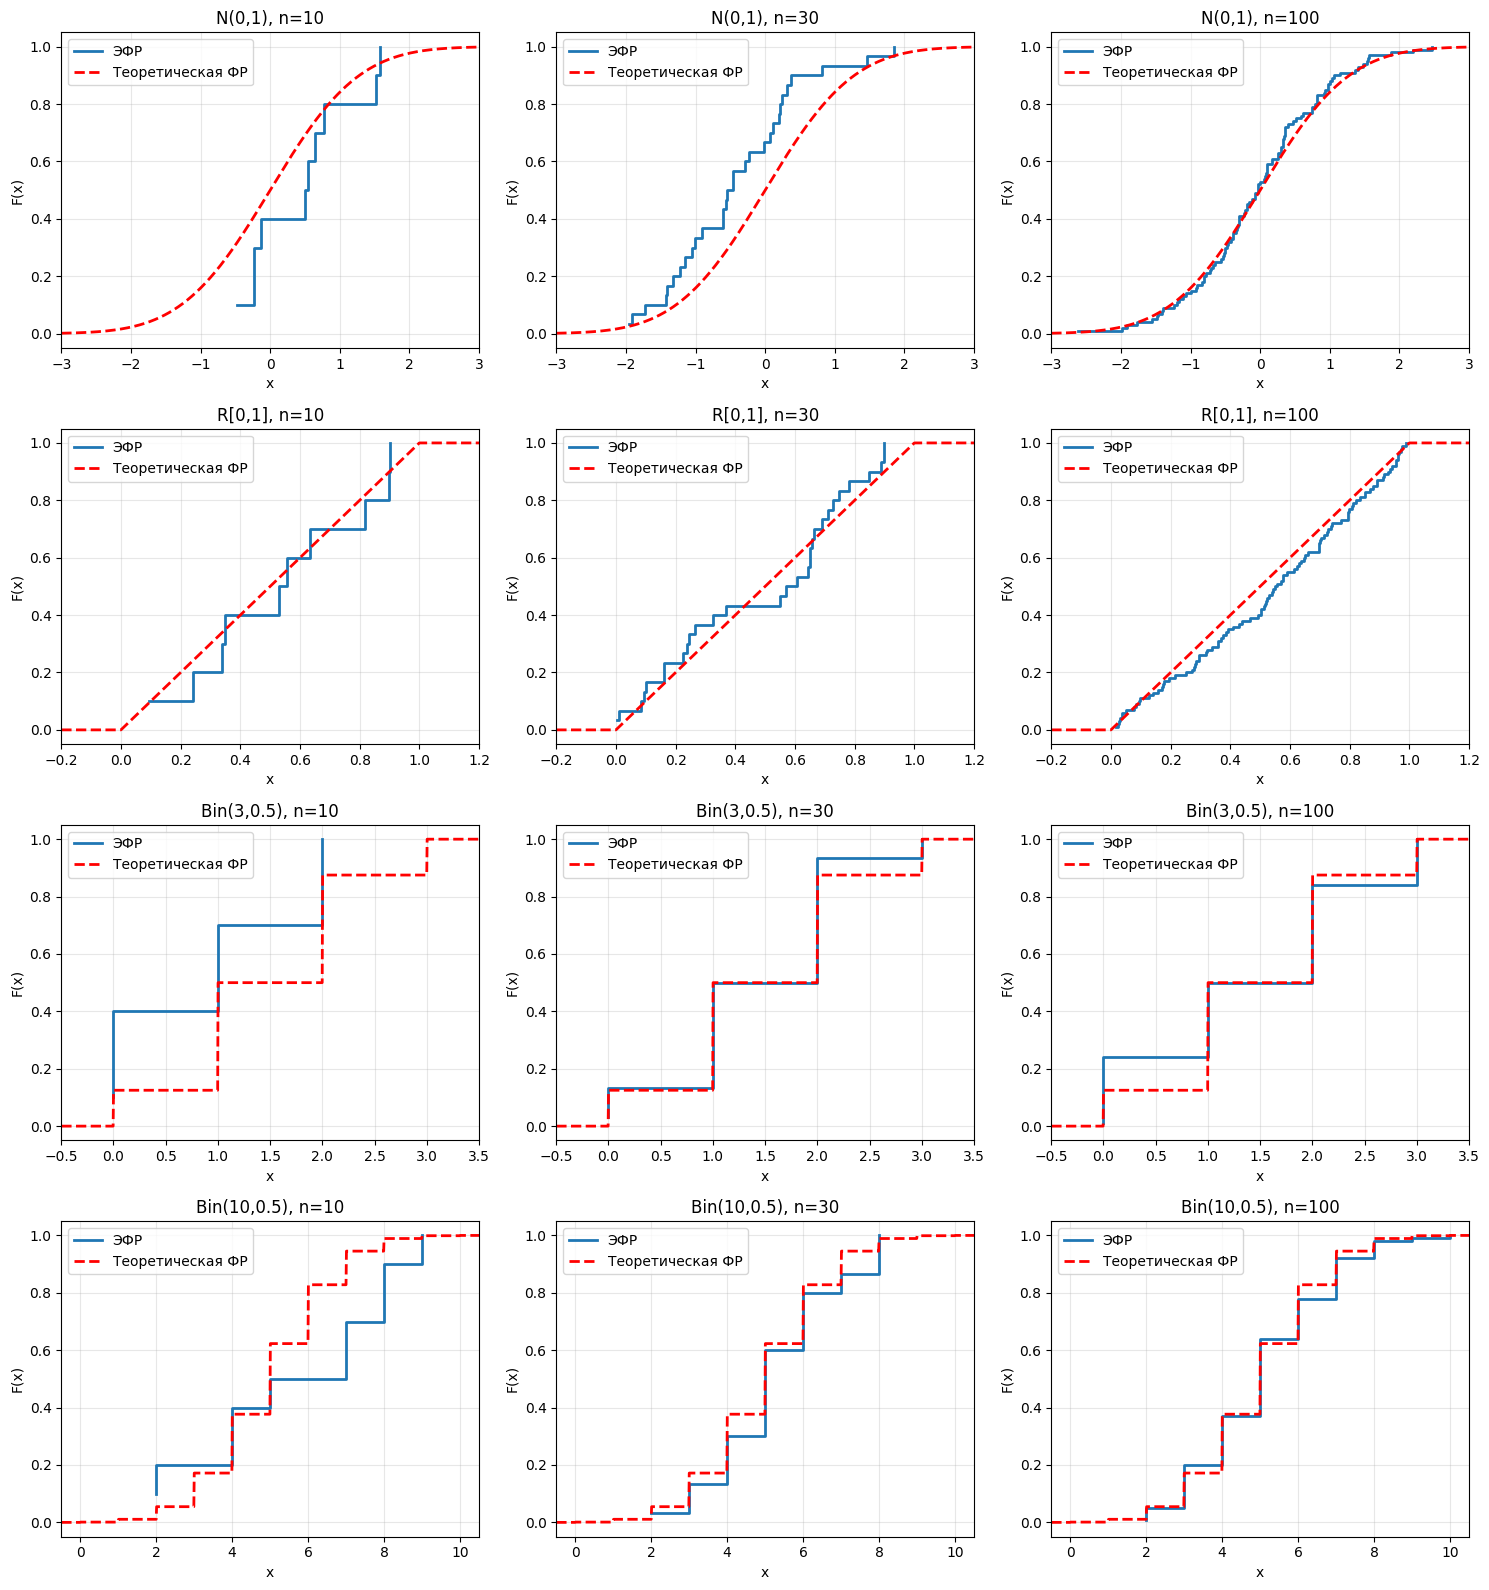

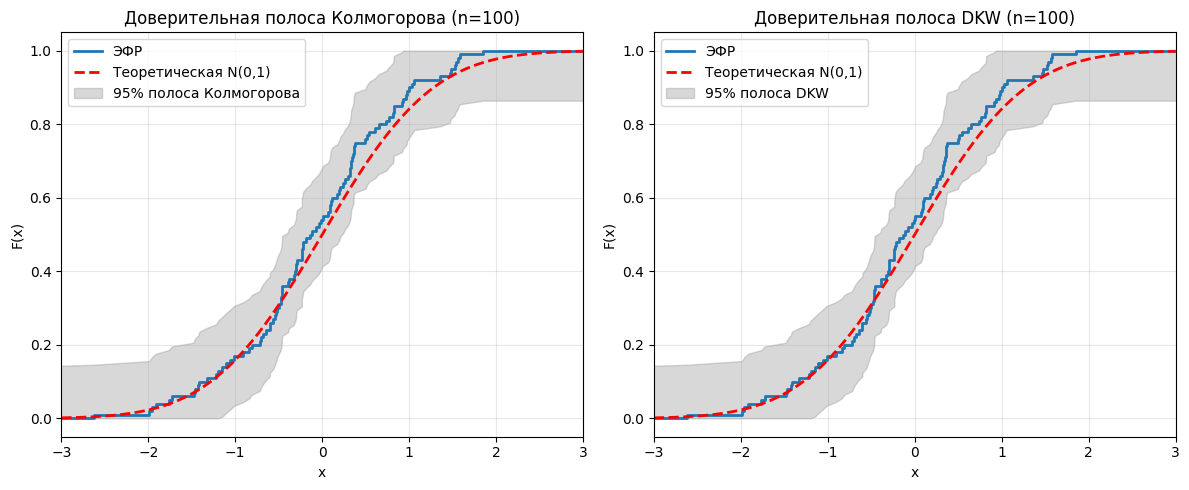

Для n=100, α=0.05:
  Ширина полосы Колмогорова: ±0.1358
  Ширина полосы DKW: ±0.1358


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kstwobign

def plot_ecdf_comparison():
    np.random.seed(42)
    n_values = [10, 30, 100]
    distributions = [
        ('N(0,1)', np.random.randn, stats.norm.cdf, (-3, 3)),
        ('R[0,1]', np.random.rand, stats.uniform.cdf, (-0.2, 1.2)),
        ('Bin(3,0.5)', lambda n: np.random.binomial(3, 0.5, n), 
         lambda x: stats.binom.cdf(x, 3, 0.5), (-0.5, 3.5)),
        ('Bin(10,0.5)', lambda n: np.random.binomial(10, 0.5, n), 
         lambda x: stats.binom.cdf(x, 10, 0.5), (-0.5, 10.5))
    ]
    
    fig, axes = plt.subplots(4, 3, figsize=(15, 16))
    
    for row_idx, (dist_name, sampler, theor_cdf, xlim) in enumerate(distributions):
        for col_idx, n in enumerate(n_values):
            ax = axes[row_idx, col_idx]
            
            # Генерируем выборку
            sample = sampler(n)
            
            # Строим ЭФР
            sorted_sample = np.sort(sample)
            ecdf = np.arange(1, n + 1) / n
            
            # Теоретическая ФР
            x = np.linspace(xlim[0], xlim[1], 1000)
            y_theor = theor_cdf(x)
            
            # Графики
            ax.step(sorted_sample, ecdf, where='post', label='ЭФР', linewidth=2)
            ax.plot(x, y_theor, 'r--', label='Теоретическая ФР', linewidth=2)
            
            ax.set_xlim(xlim)
            ax.set_ylim(-0.05, 1.05)
            ax.set_xlabel('x')
            ax.set_ylabel('F(x)')
            ax.set_title(f'{dist_name}, n={n}')
            ax.legend()
            ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_ecdf_comparison()

def plot_confidence_bands():
    np.random.seed(42)
    n = 100
    alpha = 0.05
    
    sample = np.random.randn(n)
    sorted_sample = np.sort(sample)
    ecdf = np.arange(1, n + 1) / n
    
    d_kolmogorov = kstwobign.ppf(1 - alpha) / np.sqrt(n)
    
    epsilon_dkw = np.sqrt(np.log(2/alpha) / (2*n))
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    x = np.linspace(-3, 3, 1000)
    y_theor = stats.norm.cdf(x)
    
    x_plot = np.sort(np.concatenate([[-4], sorted_sample, [4]]))
    ecdf_plot = np.concatenate([[0], ecdf, [1]])
    
    plt.step(x_plot, ecdf_plot, where='post', label='ЭФР', linewidth=2)
    plt.plot(x, y_theor, 'r--', label='Теоретическая N(0,1)', linewidth=2)
    
    upper = np.minimum(ecdf_plot + d_kolmogorov, 1)
    lower = np.maximum(ecdf_plot - d_kolmogorov, 0)
    
    plt.fill_between(x_plot, lower, upper, alpha=0.3, 
                     color='gray', label=f'95% полоса Колмогорова')
    
    plt.xlim(-3, 3)
    plt.ylim(-0.05, 1.05)
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.title(f'Доверительная полоса Колмогорова (n={n})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.step(x_plot, ecdf_plot, where='post', label='ЭФР', linewidth=2)
    plt.plot(x, y_theor, 'r--', label='Теоретическая N(0,1)', linewidth=2)
    
    upper_dkw = np.minimum(ecdf_plot + epsilon_dkw, 1)
    lower_dkw = np.maximum(ecdf_plot - epsilon_dkw, 0)
    
    plt.fill_between(x_plot, lower_dkw, upper_dkw, alpha=0.3, 
                     color='gray', label=f'95% полоса DKW')
    
    plt.xlim(-3, 3)
    plt.ylim(-0.05, 1.05)
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.title(f'Доверительная полоса DKW (n={n})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Для n={n}, α={alpha}:")
    print(f"  Ширина полосы Колмогорова: ±{d_kolmogorov:.4f}")
    print(f"  Ширина полосы DKW: ±{epsilon_dkw:.4f}")

plot_confidence_bands()

1. Сначала познакомимся с простой линейной моделью и задачей подгонки прямой под облако точек.
Для этого нужно сгенерировать модельные данные: массив X, где Xk = k/m для m = 10, 20, 50,
и массив Y, где Yi = aXi + b + εi, где a, b – количество гласных в ваших имени и фамилии
соответственно, случайные величины εi ∼ N (0, σ2) независимы (используйте σ = 1, σ = a/9).
(a) Найти оценки для коэффициентов прямой методом МНК (см. регрессия, OLS).
(b) Построить на одном графике облако точек, полученную прямую, исходную прямую.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = 2  
b = 1 

sigma_values = [1, a/9]
m_values = [10, 20, 50]

fig, axes = plt.subplots(len(m_values), len(sigma_values), figsize=(12, 8))
fig.suptitle('Линейная регрессия: облако точек и подобранные прямые')

for i, m in enumerate(m_values):
    for j, sigma in enumerate(sigma_values):
        ax = axes[i, j]
        
        X = np.array([k/m for k in range(1, m+1)])
        epsilon = np.random.normal(0, sigma, m)
        Y = a * X + b + epsilon
        
        X_mean = np.mean(X)
        Y_mean = np.mean(Y)
        
        beta1 = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean)**2)
        beta0 = Y_mean - beta1 * X_mean
        
        Y_pred = beta0 + beta1 * X
        residuals = Y - Y_pred
        sigma2_hat = np.sum(residuals**2) / (m - 2)
        
        ax.scatter(X, Y, alpha=0.6, label='Данные')
        
        x_line = np.array([0, 1])
        y_true = a * x_line + b
        ax.plot(x_line, y_true, 'g-', linewidth=2, label=f'Истинная: y={a}x+{b}')
        
        y_pred_line = beta0 + beta1 * x_line
        ax.plot(x_line, y_pred_line, 'r-', linewidth=2, 
                label=f'Подобранная: y={beta1:.2f}x+{beta0:.2f}')
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title(f'm={m}, σ={sigma:.2f}')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        print(f'm={m}, σ={sigma:.2f}:')
        print(f'  Истинные: a={a}, b={b}, σ²={sigma**2:.4f}')
        print(f'  Оценки: â={beta1:.4f}, b̂={beta0:.4f}, σ̂²={sigma2_hat:.4f}')
        print()

plt.tight_layout()
plt.show()